# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
# Your code here - drop columns with missing data
ames.dropna(axis=1)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [4]:
ames.select_dtypes("number")

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


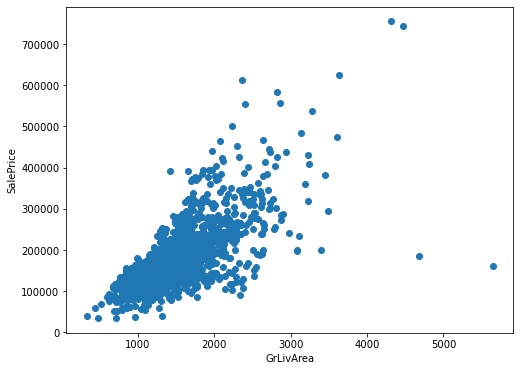

In [5]:
# continuous numeric predictor: LotArea
import matplotlib.pyplot as plt

x = ames['GrLivArea']
y = ames['SalePrice']

plt.figure(figsize = (8,6))
plt.scatter(x, y)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

### Discrete Numeric Predictor

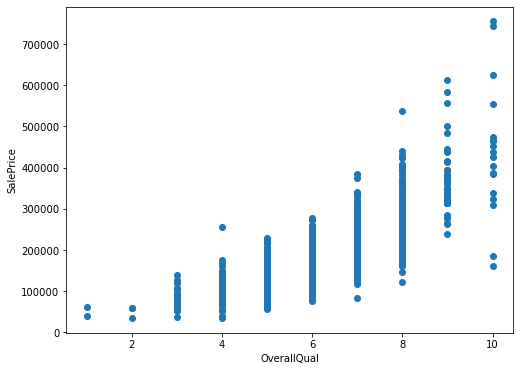

In [9]:
# Your code here - discrete numeric predictor
# discrete numeric: OverallCond
y = ames['SalePrice']
x = ames['OverallQual']

plt.figure(figsize = (8,6))
plt.scatter(x, y)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice");

### String Categorical Predictor

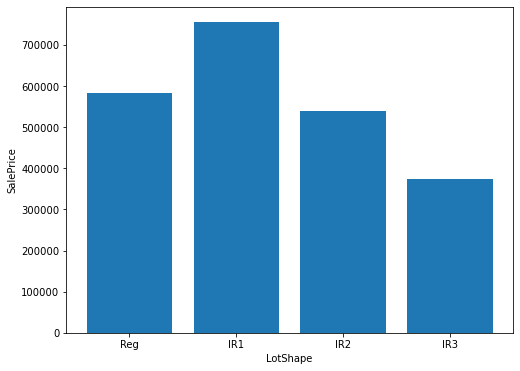

In [31]:
# Your code here - string categorical predictor
# string categorical: SaleCondition
#print(ames.select_dtypes("object").nunique().sort_values())
x = ames['LotShape']
y = ames['SalePrice']

plt.figure(figsize = (8,6))
plt.bar(x, y)
plt.xlabel("LotShape")
plt.ylabel("SalePrice");

### Discrete Categorical Predictor

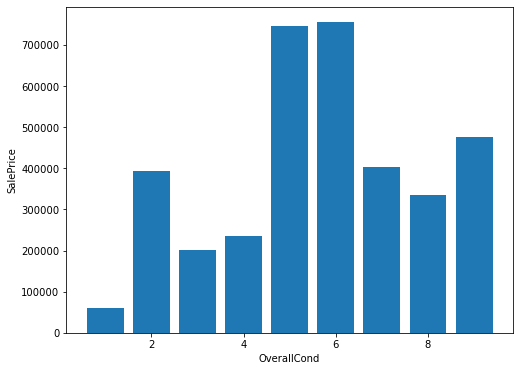

In [19]:
# Your code here - discrete categorical predictor
# discrete categorical: SaleCondition
# ames['Neighborhood'].unique()

x = ames['OverallCond']
y = ames['SalePrice']

plt.figure(figsize = (8,6))
plt.bar(x, y)
plt.xlabel("OverallCond")
plt.ylabel("SalePrice");

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [28]:
# Your code here - prepare X and y, including one-hot encoding
y = ames['SalePrice']
X = ames[['LotShape', "GrLivArea", "OverallQual" ]]
X = pd.get_dummies(X, columns=["LotShape"], drop_first=True, dtype=int)
X

,GrLivArea,OverallQual,LotShape_IR2,LotShape_IR3,LotShape_Reg
Id,,,,,
1,1710,7,0,0,1
2,1262,6,0,0,1
3,1786,7,0,0,0
4,1717,7,0,0,0
5,2198,8,0,0,0
...,...,...,...,...,...
1456,1647,6,0,0,1
1457,2073,6,0,0,1
1458,2340,7,0,0,1


In [ ]:
# Your answer here - which category or categories were dropped?


In [29]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     759.4
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:05:51   Log-Likelihood:                -17607.
No. Observations:                1460   AIC:                         3.523e+04
Df Residuals:                    1454   BIC:                         3.526e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -8.92e+04   5574.151    -16.002   

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

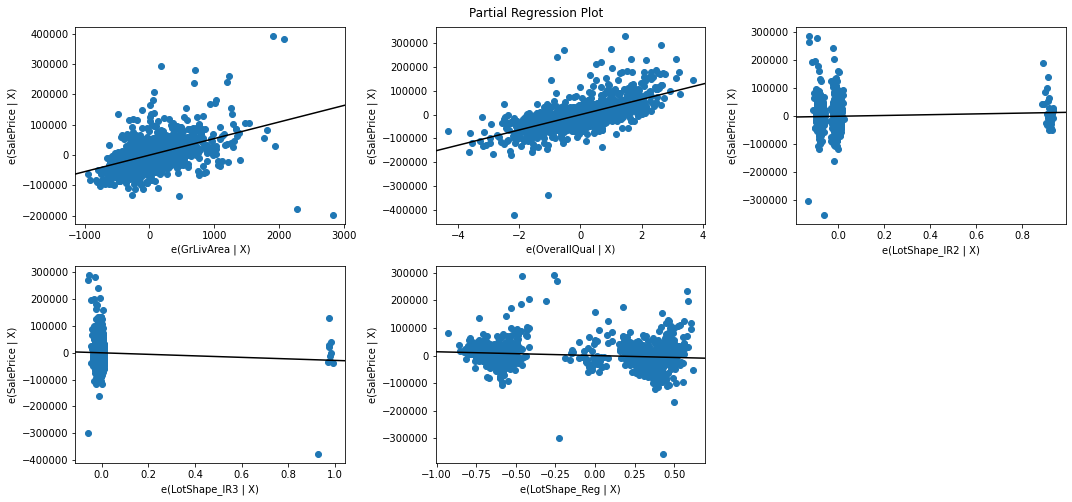

In [30]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(3,3),
    fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [27]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

28196.10510593503

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [32]:
# Your answer here
"""
With an adjusted R^2 of 0.723, the model represents 72.3% of variance in price
The GrLivArea has a pvalue < 0.05 so statistically significant
    - the cooeffienct = 54.5636 indicates that as GrLivArea increases by 1 price increases by $54.5
The OverallQual has a pvalue < 0.05 so statistically significant
    - the cooefficient = 3.213e+04 indicates that as OverAllQual increases by 1, price increases by $32,130
LotShape_IR2  1.407e+04 has a pvalue < 0.05 so statistically significant
     - the cooefficient = 1.407e+04 indicates that LotShapeIR2 adds $14,000 to price than Ir1
LotShape_IR3  -2.84e+04 has a pvalue < 0.05 so statistically significant
    - the cooefficient = -2.84e+04 indicates that LotShapeIR3 is worth $28400 less in price than Ir1
LotShape_Reg -1.376e+04 has a pvalue < 0.05 so statistically significant
    the cooefficient = -1.376e+04 indicates that LotShapeIR2 is worth $13700 less in price than Ir1
"""

'\nWith an adjusted R^2 of 0.723, the model represents 72.3% of variance in price\nThe GrLivArea has a pvalue < 0.05 so statistically significant\n    - the cooeffienct = 54.5636 indicates that as GrLivArea increases by 1 price increases by $54.5\nThe OverallQual has a pvalue < 0.05 so statistically significant\n    - the cooefficient = 3.213e+04 indicates that as OverAllQual increases by 1, price increases by $32,130\nLotShape_IR2  1.407e+04 has a pvalue < 0.05 so statistically significant\n     - the cooefficient = 1.407e+04 indicates that LotShapeIR2 adds $14,000 to price than Ir1\nLotShape_IR3  -2.84e+04 has a pvalue < 0.05 so statistically significant\n    - the cooefficient = -2.84e+04 indicates that LotShapeIR3 is worth $28400 less in price than Ir1\nLotShape_Reg -1.376e+04 has a pvalue < 0.05 so statistically significant\n    the cooefficient = -1.376e+04 indicates that LotShapeIR2 is worth $13700 less in price than Ir1\n'

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [ ]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.